In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import math
import pandas as pd
from numpy import genfromtxt

# Functions

In [2]:
def cleanData(t,dup,col1):
    
    #get rid of duplicates
    cols = np.array([])
    for i in range(len(dup)):
        if (dup[i] == True):
            cols = np.append(cols,i)     
    #t.mask(dup == True)
    
    imask = 0
    for i in range(len(col1)):
        first_match = col1[i]
        for j in range(i+1,len(col1)):
            if (first_match == col1[j]):
                cols = np.append(cols,j)
            else: break
    cols = np.unique(cols)
    cols = cols.astype(int)
    t.drop(t.index[cols])
    
    print('removed',len(cols),'rows')
        
    return t

In [3]:
def AbsoluteMagnitudes(plx,Bmag,Vmag,Gmag,Jmag,Hmag,Kmag,umag,gmag,rmag,imag,zmag):
    #Calculate distance, and absolute magnitudes
    
    Dist = np.array([])
    Bmags = np.array([])
    Vmags = np.array([])
    Gmags = np.array([])
    Jmags = np.array([])
    Hmags = np.array([])
    Kmags = np.array([])
    umags = np.array([])
    gmags = np.array([])
    rmags = np.array([])
    imags = np.array([])
    zmags = np.array([])

    Dist = 1000./plx
    Bmags = Bmag - 5 * np.log10(Dist) + 5
    Vmags = Vmag - 5 * np.log10(Dist) + 5
    Gmags = Gmag - 5 * np.log10(Dist) + 5
    Jmags = Jmag - 5 * np.log10(Dist) + 5
    Hmags = Hmag - 5 * np.log10(Dist) + 5
    Kmags = Kmag - 5 * np.log10(Dist) + 5
    umags = umag - 5 * np.log10(Dist) + 5
    gmags = gmag - 5 * np.log10(Dist) + 5
    rmags = rmag - 5 * np.log10(Dist) + 5
    imags = imag - 5 * np.log10(Dist) + 5
    zmags = zmag - 5 * np.log10(Dist) + 5
    
    return Dist, Bmags, Vmags, Gmags,Jmags,Hmags,Kmags, umags, gmags, rmags, imags, zmags

In [4]:
def SpectralType(SpType):
    SpTypeN = [0.0]*len(SpType)
    for i in range(0,len(SpType)):
            SpT = SpType[i].decode()
            if(len(SpT) > 2):
                for j in range(0,len(SpT)):
                    if(SpT[j] == 'I'):
                        SpTypeN[i] = SpTypeN[i] + 1
                    if(SpT[j] == 'V'):
                        SpTypeN[i] = SpTypeN[i] + 5
                    if(SpT[j] == '+'):
                        SpTypeN[i] = -20.
                
            else:
                SpTypeN[i] = 5.1
        
            if(SpTypeN[i] == 6):
                SpTypeN[i] = 4.
            if(SpTypeN[i] == 11):
                SpTypeN[i] = 4.5
            if(SpTypeN[i] == 9):
                SpTypeN[i] = 3.5
            if(SpTypeN[i] > 5.2):
                SpTypeN[i] = -30.
    print("Finished Luminosity Class Translation")
    count = 0
    for i in range(0,len(SpType)):
        if(SpTypeN[i] < 0.):
            count = count + 1
    test = SpType.compressed()
    good = len(test) - count
    print("  Number of single Stars: ",good,"  Binaries or Unknown luminosity class: ",count)
    return SpTypeN

In [5]:
def ColorClassification(Gmags,Kmags,colors,main_type):    
    #split the stars into different categories based on G-K
    
    G_K = Gmags-Kmags
    color = np.ones(len(G_K))*1000
    for i in range(len(colors)):
        for j in range(len(G_K)):
            if (i == 0):
                if (G_K[j] <= colors[i]):
                    color[j] = colors[i]
            elif(G_K[j] <= colors[i] and G_K[j] > colors[i-1]):
                color[j] = colors[i]
    return color

#and main_type[i] == 'Star'

In [6]:
def CreateTemplates(color,colors,Bmags, Vmags,Gmags,Jmags,Hmags,Kmags,umags,gmags,rmags,imags,zmags):
    #for each color class, a template is created of the absolute magnitudes of the stars and their color indices
    
    G_K = Gmags-Kmags
    avg_colors = np.array([])
    err_colors = np.array([])
    stars = np.array([])
    for c in colors:
        #create array of values for color indices and absolute magnitudes
        G_B_array = np.array([])
        G_V_array = np.array([])
        G_J_array = np.array([])
        G_H_array = np.array([])
        G_K_array = np.array([])
        G_u_array = np.array([])
        G_g_array = np.array([])
        G_r_array = np.array([])
        G_i_array = np.array([])
        G_z_array = np.array([])
        B = np.array([])
        V = np.array([])
        G = np.array([])
        J = np.array([])
        H = np.array([])
        K = np.array([])
        u = np.array([])
        g = np.array([])
        r = np.array([])
        i_m = np.array([])
        z = np.array([])
        star_count = 0
        #fill arrays with values if the values are part of the color category
        for i in range(len(Bmags)):
            if (color[i] == c):
                G_B_array = np.append(G_B_array,Gmags[i]-Bmags[i])
                G_V_array = np.append(G_V_array,Gmags[i]-Vmags[i])
                G_J_array = np.append(G_J_array,Gmags[i]-Jmags[i])
                G_H_array = np.append(G_H_array,Gmags[i]-Hmags[i])
                G_K_array = np.append(G_K_array,Gmags[i]-Kmags[i])
                G_u_array = np.append(G_u_array,Gmags[i]-umags[i])
                G_g_array = np.append(G_g_array,Gmags[i]-gmags[i])
                G_r_array = np.append(G_r_array,Gmags[i]-rmags[i])
                G_i_array = np.append(G_i_array,Gmags[i]-umags[i])
                G_z_array = np.append(G_z_array,Gmags[i]-zmags[i])
                B = np.append(B,Bmags[i])
                V = np.append(V,Vmags[i])
                G = np.append(G,Gmags[i])
                J = np.append(J,Jmags[i])
                H = np.append(H,Hmags[i])
                K = np.append(K,Kmags[i])
                u = np.append(u,umags[i])
                g = np.append(g,umags[i])
                r = np.append(r,rmags[i])
                i_m = np.append(i_m,imags[i])
                z = np.append(z,zmags[i])
                star_count = star_count +1
        #average G-K value (i dont think this is necessary)
        avg_colors = np.append(avg_colors,np.mean(G_K_array))
        err_colors = np.append(err_colors,np.std(G_K_array))
        #number of stars per color
        stars = np.append(stars,star_count)
        #relative SED
        mag_array = [np.mean(G_u_array),np.mean(G_B_array), np.mean(G_g_array),\
                     np.mean(G_V_array),np.mean(G_i_array), np.mean(G_r_array), \
                     np.mean(G_z_array),np.mean(G_J_array), np.mean(G_H_array), 
                     np.mean(G_K_array)]
        std_array = [np.std(G_u_array),np.std(G_B_array), np.std(G_g_array),\
                     np.std(G_V_array),np.std(G_i_array), np.std(G_r_array), \
                     np.std(G_z_array),np.std(G_J_array), np.std(G_H_array), 
                     np.std(G_K_array)]
        #absolute SED
        mag_array2 = [np.mean(u), np.mean(B), np.mean(g), \
                      np.mean(V), np.mean(i_m), np.mean(G), \
                      np.mean(r), np.mean(z), np.mean(J), \
                      np.mean(H), np.mean(K)]
        std_array2 = [np.std(u), np.std(B), np.std(g), \
                      np.std(V), np.std(i_m), np.std(G), \
                      np.std(r), np.std(z), np.std(J), \
                      np.std(H), np.std(K)]
        #add standard deviation error
        
        val = np.sqrt(len(G_B_array))
        std_array3 = std_array/val
        val2 = np.sqrt(len(B))
        std_array4 = std_array2/val2
        
        #stack SEDs
        if (c == colors[0]):
            color_mags = np.array(mag_array)
            color_std = np.array(std_array)
            color_std_err = np.array(std_array3)
            abs_color_mags = np.array(mag_array2)
            abs_color_std = np.array(std_array2)
            abs_color_std_err = np.array(std_array4)
        else:
            color_mags = np.vstack((color_mags,mag_array))
            color_std = np.vstack((color_std,std_array))
            color_std_err = np.vstack((color_std_err,std_array3))
            abs_color_mags = np.vstack((abs_color_mags, mag_array2))
            abs_color_std = np.vstack((abs_color_mags, std_array2))
            abs_color_std_err = np.vstack((abs_color_std_err,std_array4))
    return stars,color_mags,color_std,color_std_err,abs_color_mags,abs_color_std,abs_color_std_err

In [7]:
def PrintToFile(colors,stars,color_mags,color_std,color_std_err,name):
    
    rows = len(colors)
    colors2 = np.zeros([rows,1])
    stars2 = np.zeros([rows,1])
    for i in range(rows):
        colors2[i,0] = colors[i]
        stars2[i,0] = stars[i]
    
    arrays=[stars2,color_mags,color_std,color_std_err]

    # Create an array to return to
    FinalTemplate = colors2

    for array in arrays:
        FinalTemplate = np.concatenate([FinalTemplate, array],axis = 1)
        
    columns = 'color,number_of_stars,G_B,G_V,G_J,G_H,G_K,G_B_std,G_V_std,G_J_std,G_H_std,G_K_std,' + \
            'G_B_std_err,G_V_std_err,G_J_std_err,G_H_std_err,G_K_std_err'
        
    np.savetxt(name, FinalTemplate, delimiter=",",header = columns)
    
    return FinalTemplate

# Read in Data and Create Templates

In [8]:
t = pd.read_csv('../Cat_GAIA200pc_2MASS_SDSS_v1_XmatchSimbad.csv')

print("The reader loads the data into the following variable names:")
print(list(t))
print("\nThe number of stars is " + str(len(t)))

dup = t['duplicated_source']
col1 = t["col1"]

#Clean Data
#t = cleanData(t,dup,col1)

Source = t["source_id"]
#Using Gmag in place of Vmag and Bmag to calculate Vmags and Bmags
Bmag = t["phot_g_mean_mag"]
Vmag = t["phot_g_mean_mag"]
Gmag = t["phot_g_mean_mag"]
Jmag = t["j_m"]
Hmag = t["h_m"]
Kmag = t["ks_m"]
umag = t["u_mag"]
gmag = t["g_mag"]
rmag = t["r_mag"]
imag = t["i_mag"]
zmag = t["z_mag"]
plx = t['plx']
dup = t['duplicated_source'] 
col1 = t["col1"]
main_type = t["main_type"]
SpType = t["sp_type"]

Dist,Vmags,Bmags,Gmags,Jmags,Hmags,Kmags,umags,gmags,rmags,imags,zmags = \
AbsoluteMagnitudes(plx,Vmag,Bmag,Gmag,Jmag,Hmag,Kmag,umag,gmag,rmag,imag,zmag)


C:\Users\Roxana\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The reader loads the data into the following variable names:
['angDist', 'col1', 'solution_id', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_good_obs_ac', 'astrometric_n_bad_obs_al', 'astrometric_n_bad_obs_ac', 'astrometric_delta_q', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_primary_flag', 'astrometric_relegation_factor', 'astrometric_weight_al', 'astrometric_weight_ac', 'astrometric_priors_used', 'matched_observations', 'duplicated_source', 'scan_direction_strength_k1', 'scan_direction_strength_k2', 'scan_direction_strength_k3', 'scan_direction_strength_k4', 'scan_direct

In [9]:
wvl = [358,420,475,477,620,769,966,1235,1662,2159]
wvl2 = [358,420,475,477,620,673,769,966,1235,1662,2159]
colors = np.arange(0.1,4,0.1) 

color = ColorClassification(Gmags,Kmags,colors,main_type)
stars,color_mags,color_std,color_std_err,abs_color_mags,abs_color_std,abs_color_std_err = \
CreateTemplates(color,colors,Vmags,Bmags,Gmags,Jmags,Hmags,Kmags,umags,gmags,rmags,imags,zmags)

In [12]:
color

array([  1.50000000e+00,   1.50000000e+00,   1.50000000e+00, ...,
         5.00000000e-01,   1.00000000e+03,   1.00000000e+03])

In [13]:
color_mags

array([[        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.25130699,  0.25823733,  0.28839854],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.6442946 ,         nan,  0.83922644],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.93323091,         nan,  1.27764897],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  1.20549843,         nan,  1.70107275],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  1.50287944,  2.03567508,  2.17078934],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  1.86203608,  2.4979019 ,  2.67255685]])

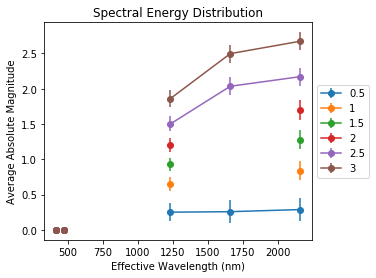

In [14]:
ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl, color_mags[i,:], yerr = color_std[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('Average Absolute Magnitude')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [16]:
color

array([  1.40000000e+00,   1.40000000e+00,   1.40000000e+00, ...,
         2.00000000e-01,   1.00000000e+03,   1.00000000e+03])

In [17]:
color_mags

array([[        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.09674402,  0.06240857,  0.07240224],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.26538641,  0.2753466 ,  0.31117557],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.41086613,  0.46490269,  0.50786948],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.55407904,         nan,  0.71019476],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.7006273 ,         nan,  0.91952323],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.82677664,         nan,  1.1127292 ],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.94963157

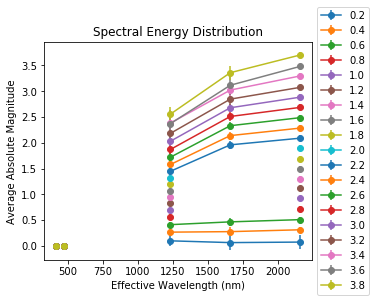

In [18]:
ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl, color_mags[i,:], yerr = color_std[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('Average Absolute Magnitude')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [13]:
name = 'Template2_2.csv'
finaltemplate = PrintToFile(colors,stars,color_mags,color_std,color_std_err,name)

In [10]:
color

array([  1.40000000e+00,   1.30000000e+00,   1.30000000e+00, ...,
         1.00000000e-01,   1.00000000e+03,   1.00000000e+03])

In [11]:
color_mags

array([[        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.04084394, -0.00460121, -0.00714762],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.15264411,  0.12941834,  0.15195211],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.22172586,  0.2195265 ,  0.25249959],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.29604583,  0.31454472,  0.35237916],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.37180461,  0.41198301,  0.45220769],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.44105003,  0.50579517,  0.55088086],
       [        nan,  0.        ,         nan,  0.        ,         nan,
                nan,         nan,  0.51440293

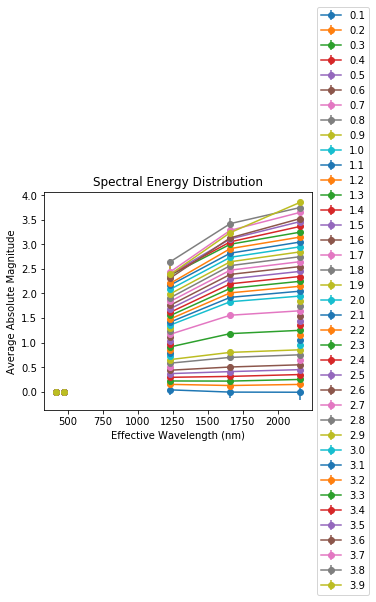

In [12]:
ax = plt.subplot(111)
for i in range(len(colors)):
    ax.errorbar(wvl, color_mags[i,:], yerr = color_std[i,:], linestyle = '-', marker = 'o',label = str(colors[i]))
ax.set_xlabel('Effective Wavelength (nm)')
ax.set_ylabel('Average Absolute Magnitude')
ax.set_title('Spectral Energy Distribution')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [53]:
t[t['sp_type'].str.contains('V',na=False)]

,angDist,col1,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,V,R,J,H,K,u,g,r,i,z
9,0.173802,7,1635378410781933568,2553939492965084160,404048057,2015.0,7.989035,0.268764,3.862348,0.160710,...,8.720,NaN,7.827,7.584,7.578,NaN,NaN,NaN,NaN,NaN
16,0.633675,14,1635378410781933568,2677922485697092864,422607503,2015.0,334.569521,0.424091,-0.479533,0.116590,...,9.560,NaN,8.680,8.487,8.389,NaN,NaN,NaN,NaN,NaN
18,0.187240,16,1635378410781933568,4469455839961160320,215845229,2015.0,270.980327,0.241961,3.562659,0.302203,...,9.160,NaN,8.008,7.799,7.683,NaN,NaN,NaN,NaN,NaN
23,0.119840,21,1635378410781933568,4201183695794659840,987627875,2015.0,288.333212,0.346753,-9.181125,0.412126,...,10.140,NaN,8.991,8.766,8.701,NaN,NaN,NaN,NaN,NaN
37,0.251424,35,1635378410781933568,2143847082010882176,778164483,2015.0,281.873333,0.660270,49.431977,0.816485,...,7.180,NaN,6.399,6.292,6.253,NaN,NaN,NaN,NaN,NaN
40,0.547305,38,1635378410781933568,2339972056298802816,824110014,2015.0,358.958062,0.263730,-23.605036,0.091809,...,9.530,NaN,8.773,8.636,8.529,NaN,9.951,9.509,9.420,NaN
54,0.634913,52,1635378410781933568,5663982864560826624,447069886,2015.0,148.457289,0.332237,-22.530824,0.152410,...,9.640,NaN,8.409,8.105,8.019,NaN,NaN,NaN,NaN,NaN
66,0.808555,63,1635378410781933568,2397001010012032000,142748714,2015.0,344.294767,0.165462,-21.175611,0.165520,...,9.640,NaN,8.336,7.985,7.867,NaN,NaN,NaN,NaN,NaN
90,0.898789,86,1635378410781933568,6549328525102180096,280101842,2015.0,350.243710,0.303344,-37.687247,0.154180,...,NaN,NaN,8.098,7.833,7.791,NaN,NaN,NaN,NaN,NaN
94,0.744561,90,1635378410781933568,4662395048030251776,515305666,2015.0,71.925891,0.256601,-67.245586,0.637991,...,9.700,NaN,8.794,8.571,8.564,NaN,NaN,NaN,NaN,NaN


In [76]:
t[t['main_type'].str.contains('Star',na=False)]

,angDist,col1,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,V,R,J,H,K,u,g,r,i,z
2,0.561917,2,1635378410781933568,1913522932412343680,619926269,2015.0,351.862678,0.217490,36.458754,0.136981,...,10.890,NaN,9.957,9.666,9.666,NaN,NaN,NaN,NaN,NaN
3,0.277040,3,1635378410781933568,1838569911941919232,241559528,2015.0,316.580426,0.308632,22.947063,0.178785,...,10.510,NaN,9.470,9.261,9.206,NaN,NaN,NaN,NaN,NaN
4,0.676757,4,1635378410781933568,2732658510989957504,66735440,2015.0,338.635904,0.248710,13.997062,0.141937,...,10.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.795661,4,1635378410781933568,2732658510989957504,66735440,2015.0,338.635904,0.248710,13.997062,0.141937,...,12.990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.115723,5,1635378410781933568,5193494520410407296,841072787,2015.0,129.844477,0.245618,-83.472263,0.322615,...,11.420,NaN,9.938,9.557,9.505,NaN,NaN,NaN,NaN,NaN
8,0.533174,6,1635378410781933568,6396966175183507072,63870848,2015.0,328.321464,0.183380,-68.196340,0.184606,...,12.170,NaN,10.770,10.404,10.313,NaN,NaN,NaN,NaN,NaN
9,0.173802,7,1635378410781933568,2553939492965084160,404048057,2015.0,7.989035,0.268764,3.862348,0.160710,...,8.720,NaN,7.827,7.584,7.578,NaN,NaN,NaN,NaN,NaN
10,0.660486,8,1635378410781933568,5905714172420355712,602040395,2015.0,219.163884,0.322335,-48.017473,0.164523,...,10.600,NaN,9.500,9.197,9.144,NaN,NaN,NaN,NaN,NaN
11,0.273543,9,1635378410781933568,6539763804732400000,34968586,2015.0,345.591123,0.161611,-45.512189,0.960300,...,10.000,NaN,8.238,7.806,7.658,NaN,NaN,NaN,NaN,NaN
12,0.446382,10,1635378410781933568,5749266793206731008,656231537,2015.0,131.494660,0.185070,-10.242714,0.194533,...,7.830,NaN,6.020,5.482,5.364,NaN,NaN,NaN,NaN,NaN


In [9]:
print(Gmags)

0          4.884418
1          3.510744
2          4.373279
3          3.800938
4          3.567046
5               NaN
6               NaN
7          4.467917
8          5.407043
9          2.074634
10         3.904879
11         3.174532
12         0.954925
13         4.706710
14         4.887636
15         3.856106
16         2.891283
17         4.863281
18         2.414962
19         3.523062
20         3.755228
21         2.500468
22         3.203385
23         3.371642
24         4.350457
25         4.619759
26         4.574420
27         2.057107
28         4.681898
29         3.668110
            ...    
197640     8.674730
197641          NaN
197642          NaN
197643     7.922561
197644     7.365176
197645     7.100822
197646     4.721390
197647     6.345119
197648          NaN
197649     8.743517
197650     8.826164
197651          NaN
197652     5.687306
197653     7.428581
197654     9.625742
197655          NaN
197656     6.459066
197657    10.237408
197658     8.293647
